## SAS Data Science Methodology

Access - Identify analysis tables that will be used in load those tables. 
Investigate - Inspect tables to determine whether any changes are needed for data items due to data inconsistencies or data quality issues, as well as identify any new data items that need to be calculated. 
Prepare - Correct any data quality issues and create any new calculated items needed for analysis. 
Analyze - Explore  data to identify any patterns, relationships, and trends. 
Report - Develop interactive reports that can be shared via the web or a mobile device.

importing an image

In [14]:
from IPython.display import display, HTML
 
image_url = "https://www.canr.msu.edu/home_gardening/uploads/images/Photo1-Rusty.jpg?language_id=1"
html_code = f'<img src="{image_url}" width="300">'
 
display(HTML(html_code))

Bumble bees are important pollinators of wild flowering plants and agricultural crops. They are able to fly in cooler temperatures and lower light levels than many other bees, making them excellent pollinators—especially at higher elevations and latitudes. They also perform a behavior called “buzz pollination,” in which the bee grabs the flower in her jaws and vibrates her wing muscles to dislodge pollen from the flower. Many plants, including a number of wildflowers and crops like tomatoes, peppers, and cranberries, benefit from buzz pollination.

Because they are essential pollinators, loss of bumble bees can have far ranging ecological consequences. Alarmingly, recent work by the Xerces Society in concert with IUCN Bumble Bee Specialist Group, indicates that some species have experienced rapid and dramatic declines more than others. In fact, more than one quarter (28%) of all North American bumble bees are facing some degree of extinction risk. While some species have received considerable conservation attention, other species such as the Suckley cuckoo bumble bee and the variable cuckoo bumble bee have been largely overlooked.

For information about our efforts to conserve the rusty patched bumble bee (Bombus affinis), please see its <a href='https://www.xerces.org/rusty-patched-bumble-bee/'>profile page</a> and check out this <a href='https://storymaps.arcgis.com/stories/c5e591a19eb24d28af483ede7b174434'>story map</a>.

## Data Access Python

#### Reading a CSV File into a DataFrame

Reading a CSV file into a DataFrame is the first step in data analysis using pandas. This task involves loading data from a CSV file into a pandas DataFrame, which provides a powerful and flexible data structure for data manipulation and analysis. The read_csv function is used to read the CSV file, making the data easily accessible for various operations such as filtering, grouping, and aggregating.

In [1]:
import pandas as pd

In [2]:
# Read the North American bumblebee CSV file into a DataFrame for easy data manipulation and analysis.
df1=pd.read_csv("https://raw.githubusercontent.com/CharuSAS/SASPythonDataScientists/main/pattern_widespread_decline__N_American_Bumblebees.csv" , encoding='latin-1')

/tmp/ipykernel_140/300629850.py:2: DtypeWarning: Columns (25,130) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("https://raw.githubusercontent.com/CharuSAS/SASPythonDataScientists/main/pattern_widespread_decline__N_American_Bumblebees.csv" , encoding='latin-1')


In [ ]:
# Read the mexican bumblebee CSV file into a DataFrame for easy data manipulation and analysis.
df2=pd.read_csv("https://raw.githubusercontent.com/CharuSAS/SASPythonDataScientists/main/pattern_widespread_decline__Mexican_Bumblebees.csv")
print(df2.tail())

## Data Exploration

#### Get to know Python metadata

In [ ]:
df1.describe

In [ ]:
print(df1.dtypes)

dropping columns with all missing values

In [5]:
cols = df1.columns[df1.isnull().all()]
df1.drop(cols, axis=1, inplace=True)

In [6]:
df1.describe

<bound method NDFrame.describe of               id institutionCode collectionCode      basisOfRecord  \
0      699384987        USDA-ARS           BBSL  PreservedSpecimen   
1      699384988        USDA-ARS           BBSL  PreservedSpecimen   
2      699384989        USDA-ARS           BBSL  PreservedSpecimen   
3      699384990        USDA-ARS           BBSL  PreservedSpecimen   
4      699384991        USDA-ARS           BBSL  PreservedSpecimen   
...          ...             ...            ...                ...   
66902  767151731        USDA-ARS           BBSL  PreservedSpecimen   
66903  767151732        USDA-ARS           BBSL  PreservedSpecimen   
66904  767151733        USDA-ARS           BBSL  PreservedSpecimen   
66905  767151734        USDA-ARS           BBSL  PreservedSpecimen   
66906  767151735        USDA-ARS           BBSL  PreservedSpecimen   

       occurrenceID catalogNumber                recordedBy    year  month  \
0         699384987    BBSL221088              

In [ ]:
print(df1.tail())

In [7]:
df1.dtypes

id                            int64
institutionCode              object
collectionCode               object
basisOfRecord                object
occurrenceID                  int64
catalogNumber                object
recordedBy                   object
year                        float64
month                       float64
day                         float64
country                      object
stateProvince                object
county                       object
locality                     object
minimumElevationInMeters    float64
verbatimLatitude            float64
verbatimLongitude           float64
identifiedBy                 object
scientificName               object
kingdom                      object
phylum                       object
class                        object
order                        object
family                       object
genus                        object
specificEpithet              object
scientificNameAuthorship     object
dtype: object

https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte encoding=latin-1

In [ ]:
df2.tail()

## Data Exploration

##### Concatenating 2 data frames to combine North American(excluding Alaska) and Mexican Bumblebees

##### great explanation https://realpython.com/pandas-merge-join-and-concat/
https://pandas.pydata.org/docs/user_guide/merging.html

In [5]:
dfbig=pd.concat([df1,df2])

In [6]:
dfbig.describe

<bound method NDFrame.describe of            id  type  modified  language  license  rightsHolder  accessRights  \
0   699384987   NaN       NaN       NaN      NaN           NaN           NaN   
1   699384988   NaN       NaN       NaN      NaN           NaN           NaN   
2   699384989   NaN       NaN       NaN      NaN           NaN           NaN   
3   699384990   NaN       NaN       NaN      NaN           NaN           NaN   
4   699384991   NaN       NaN       NaN      NaN           NaN           NaN   
..        ...   ...       ...       ...      ...           ...           ...   
19  767112267   NaN       NaN       NaN      NaN           NaN           NaN   
20  767113738   NaN       NaN       NaN      NaN           NaN           NaN   
21  767135957   NaN       NaN       NaN      NaN           NaN           NaN   
22  767136283   NaN       NaN       NaN      NaN           NaN           NaN   
23  767140079   NaN       NaN       NaN      NaN           NaN           NaN   

    b

#### Drop columns from pandas dataframe

##### Dropping Columns by Column Position


###### You can find out name of first column by using this command df.columns[0]. Indexing in python starts from 0.

In [ ]:
cols=[2,3,4,5,6,7,8,9,10,11]
df.drop = (dfbig.columns[cols],axis=1)


Dropping Columns with Missing Values Greater than 50%<br>
% of missing values can be calculated by mean of NAs in each column.

In [51]:
cols = dfbig.columns[dfbig.isnull().all()]
dfbig.drop(cols, axis=1, inplace=True)

In [ ]:
dfbig.describe

#### Get to know data types

In [ ]:
print(dfbig.dtypes)

When you import data into a Pandas DataFrame, Pandas by default tries to know the data types of each column. Columns with text are by default marked as Object datatype.

But Object dtype have a much broader scope. They can not only include strings, but also any other data that Pandas doesn't understand.

After Pandas 1.0 (now 1.1.2), there's a dedicated dtype to handle and work with text data, that is, String.🤔

How is this important?

When a column is Object type, it does not necessarily mean that all the values will be string.

In fact, they can all be numbers, or a mixture of string, integers and floats.

With this discrepancy present, you can not do any string operation on the column straightaway.

Moreover, having dtype as Object will make it less clear to work with just text and exclude the non-text values.

With the new String dtype, the values are explicitly treated as strings.

Convert the DataFrame to use best possible dtypes.

In [20]:
dfconv = dfbig.convert_dtypes()
dfconv.dtypes

id                                   Int64
institutionCode             string[python]
collectionCode              string[python]
basisOfRecord               string[python]
occurrenceID                         Int64
catalogNumber               string[python]
year                                 Int64
month                                Int64
day                                  Int64
country                     string[python]
stateProvince               string[python]
county                      string[python]
locality                    string[python]
verbatimLatitude                   Float64
verbatimLongitude                  Float64
scientificName              string[python]
kingdom                     string[python]
phylum                      string[python]
class                       string[python]
order                       string[python]
family                      string[python]
genus                       string[python]
specificEpithet             string[python]
scientificN

#### Request descriptive statistics

In [ ]:
print(dfconv.describe())

do not use

In [14]:
this didnt work do not use
print("coltype before conversion", dfbig['country'].dtype)
dfbig['country'].astype("string")
print("coltype after conversion", dfbig['country'].dtype)

coltype before conversion object


#### Request first 5 rows of data

In [ ]:
print(dfconv.head())

In [ ]:
print(dfconv.tail())

## Pattern Matching in Python

In [1]:
import regex as re

## Data Manipulation

##  Filtering Rows Based on a Condition

Filtering rows based on a condition is a common data management task that allows you to focus on a specific subset of your data. By applying a condition to a column, such as selecting rows where the pollinator_genus is Bumblebee, you can isolate and analyze the data that meets your criteria. This helps in drawing insights and making data-driven decisions based on relevant data subsets.

In [ ]:
# Filter rows where 
filtered_df = df.query('pollinator_genus == "Bombus"')
print(filtered_df)

In [ ]:
# Filter rows where 
filtered_df = dfbig.query('pollinator_genus == "Bombus"')
print(filtered_df)

print creates a basic looking output, use df.head etc. instead
python is object oriented, so every line of code uses an object.
following cell is indexing. df is the dataframe. df[1] selects first row, df[1,2] selects first row, 2nd col; df[0:10, 2]

In [ ]:
df[df['pollinator_genus'] == 'Bombus']

In [ ]:
df['pollinator_genus'] == 'Bombus'

In [9]:
sum(df['pollinator_genus'] == 'Bombus')
 

11087

In [10]:
sum(~(df['pollinator_genus'] == 'Bombus'))

56867

In [13]:
sum((df['pollinator_genus'] != 'Bombus'))

56867

## Handling Missing Values Fill missing values with the column mean

Handling missing values is crucial for maintaining data integrity and ensuring accurate analysis. Missing data can be filled using various methods, such as replacing them with the column mean. This task involves using the fillna function to fill any NaN (Not a Number) values in the DataFrame with the mean of their respective columns, thereby preventing potential biases or errors in subsequent analyses.

In [ ]:
df.fillna(df.mean(), inplace=True)
print(df)


## Applying a Function to Each Column

Applying a function to each column allows you to perform element-wise operations across the DataFrame. This task involves using the apply function with a lambda function to modify the values in each column. For example, multiplying each element by 2. This technique is useful for standardizing data, performing calculations, and transforming data values as needed.

In [ ]:
# Apply a lambda function to each column
df = df.apply(lambda x: x*2)
print(df)

## Exporting DataFrame to CSV

In [ ]:
# Export the DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)
print("DataFrame exported to cleaned_data.csv")

## Grouping Aggregating Data

In [ ]:
4. Grouping Data and Calculating Aggregates
# Group by column 'country' and calculate the count of each group
grouped_df = dfconv.groupby("Country").sum()
print(grouped_df)

In [ ]:
dfconv["country"].groupby("country").sum()


4. Count Frequency Value Using GroupBy.size()
df.groupby().size() function to get the count frequency of single or multiple columns,  Apply the size() function on the resulting Groupby() object to get a frequency count.

In [ ]:
list(df1)

get a python list

In [13]:
df1.select_dtypes(include=['object']).columns

Index(['institutionCode', 'collectionCode', 'basisOfRecord', 'catalogNumber',
       'recordedBy', 'country', 'stateProvince', 'county', 'locality',
       'identifiedBy', 'scientificName', 'kingdom', 'phylum', 'class', 'order',
       'family', 'genus', 'specificEpithet', 'scientificNameAuthorship'],
      dtype='object')

In [ ]:
pd.crosstab(index=df1['column'])

frequency counts for all categorical variables
for loop-instead of looping over index; iterating thro categorical columns
column =goes thro each of the list elements
display - print -running crosstab method in pandas;

In [19]:
tables=[]
for column in df1.select_dtypes(include=['object']).columns:
    tables.append(pd.crosstab(index=df1[column], columns='number of observations'))

In [20]:
tables

[col_0            number of observations
 institutionCode                        
 USDA-ARS                          66907,
 col_0           number of observations
 collectionCode                        
 BBSL                             66907,
 col_0              number of observations
 basisOfRecord                            
 PreservedSpecimen                   66907,
 col_0          number of observations
 catalogNumber                        
 130930                              1
 130931                              1
 134464                              1
 134465                              1
 135180                              1
 ...                               ...
 ZION40952                           1
 ZION40977                           1
 ZION41037                           1
 ZION41042                           1
 bbsl771218                          1
 
 [66907 rows x 1 columns],
 col_0                             number of observations
 recordedBy                    

In [ ]:
for column in df1.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=df1[column], columns='number of observations'))

In [ ]:
for column in df1.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=df1[column], columns='% observations', normalize='columns')*100)

In [11]:
dfcount=df1.groupby(list(df1)).size()
print("counts",dfcount)

counts id         institutionCode  collectionCode  basisOfRecord      occurrenceID  catalogNumber  recordedBy                        year    month  day   country  stateProvince  county    locality                                         minimumElevationInMeters  verbatimLatitude  verbatimLongitude  identifiedBy        scientificName       kingdom   phylum      class    order        family  genus   specificEpithet  scientificNameAuthorship
699384992  USDA-ARS         BBSL            PreservedSpecimen  699384992     JPS22997       E.S. Ross                         1982.0  8.0    30.0  USA      Arizona        Cochise   Cochise Stronghold, Dragoon Mountains            1219.0                    31.92517          -109.96727         R.S. Jacobson 1991  Bombus bifarius      Animalia  Arthropoda  Insecta  Hymenoptera  Apidae  Bombus  bifarius         Cresson 1878                1
699384997  USDA-ARS         BBSL            PreservedSpecimen  699384997     BBSL398573     T.L. Griswold           

In [ ]:
dfcount=df1.groupby(['country']).size()
print("counts",dfcount)

counts country
Canada       447
UNKNOWN       46
USA        66325
dtype: int64


In [ ]:
dfcount=dfconv.groupby(['country']).size()
print("counts",dfcount)

counts country
Canada       447
Mexico        24
UNKNOWN       46
USA        66325
dtype: int64


The nunique() method returns the number of unique values for each column.

By specifying the column axis (axis='columns'), the nunique() method searches column-wise and returns the number of unique values for each row.

Syntax
dataframe.nunique(axis, dropna)

In [34]:
dfconv.nunique('columns')

0        21
1        21
2        21
3        21
4        21
         ..
66902    19
66903    19
66904    19
66905    19
66906    19
Length: 66931, dtype: int64

In [ ]:
diff types is the problem
dfconv.apply(lambda x: x.value_counts()).T.stack()

In [8]:
count = df1.groupby(['country', 'stateProvince', 'scientificName']).size() 
print(count) 

country  stateProvince     scientificName      
Canada   Alberta           Bombus occidentalis      12
                           Bombus terricola          2
         British Columbia  Bombus occidentalis       2
                           Bombus pensylvanicus      5
                           Bombus terricola          1
                                                  ... 
USA      Wyoming           Bombus occidentalis     324
                           Bombus rufocinctus        1
                           Bombus suckleyi           1
                           Bombus terricola          2
                           Bombus vosnesenskii       2
Length: 639, dtype: int64


In [ ]:
count = dfconv.groupby(['country', 'stateProvince', 'scientificName']).size() 
print(count) 

country  stateProvince     scientificName      
Canada   Alberta           Bombus occidentalis      12
                           Bombus terricola          2
         British Columbia  Bombus occidentalis       2
                           Bombus pensylvanicus      5
                           Bombus terricola          1
                                                  ... 
USA      Wyoming           Bombus occidentalis     324
                           Bombus rufocinctus        1
                           Bombus suckleyi           1
                           Bombus terricola          2
                           Bombus vosnesenskii       2
Length: 644, dtype: int64


In [ ]:
count = df['fruit'].value_counts()['apple']

print(f"The number of apples is: {count}")

## Merging data frames

In [ ]:
# Merge df1 and df2 on column 'id'
merged_df = pd.merge(df1, df2, on='id')
print(merged_df)

## Pivoting data frames

In [ ]:
# Pivot the DataFrame on 'index', 'columns', and 'values'
pivot_df = df.pivot(index='date', columns='category', values='value')
print(pivot_df)

## Resampling Time Series Data


In [ ]:
# Resample time series data to monthly frequency
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
monthly_df = df.resample('M').sum()
print(monthly_df)

## Removing Duplicate Rows

In [ ]:

# Remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)
print(df)

## Saving imported file to workbench

In [ ]:
import requests

# File path and name
file_path = r"/workspaces/myfolder/MachineLearning/hmeq.csv"
 
# Specify the URL of the CSV file
url = r"https://support.sas.com/documentation/onlinedoc/viya/exampledatasets/hmeq.csv"
 
# Download the and save CSV file to Workbench
response = requests.get(url)
with open(file_path, 'wb') as f:
    f.write(response.content)
    print(f'File downloaded:{file_path}')

In [1]:
#2.1 don't run this bit - its a comment
print('Today is Tuesday')

Today is Tuesday


In [3]:
#2.1 indenting
chictemp = [59, 60, 61, 62, 63]
for i in chictemp:
celsius = (i - 32) * 5/9  
print('Temp for a canadian is:', celsius)

IndentationError: expected an indented block (<ipython-input-3-72d5f868c653>, line 4)

In [4]:
#2.1 inconsistent casing
city = "Chicago"
print(City)
# This will output a NameError because 
# the casing is not consistent.


NameError: name 'City' is not defined

In [5]:
#2.1 order of first occurence
print(year)
year=2018

NameError: name 'year' is not defined

In [6]:
#2.2 The operator + is used to concatenate two strings as the operation returns "hello world"
"hello"+" world"

'hello world'

In [7]:
#2.2 The operator * is known as the repetition operator as the operation returns "Hello Hello"
"Hello " *2

'Hello Hello '

In [80]:
#2.2 string indexing 
text='Hello'
print (text[0]);
print (text[1]);
print (text[2]);
print (text[3]);
print (text[4]);

H
e
l
l
o


In [9]:
#2.2 numeric
this_int = 1
this_float = 1.2
print(this_int + 3)
print(this_float + this_int)
print(this_float + 3)


4
2.2
4.2


In [10]:
#2.2 mathematical operations
x=1
y=1.5
z=x*y
print('x is:', type(x))
print('y is:', type(y))
print('z is:', z, 'with type:', type(z))

x is: <class 'int'>
y is: <class 'float'>
z is: 1.5 with type: <class 'float'>


In [11]:
#2.2 empty list
a = [] 
type(a)

list

In [12]:
#2.2 populated list
b = [2,4,6]
type(b)

list

In [13]:
#2.2 list containing diff data types
c = list(['fall',10,'october'])
type(c)

list

In [14]:
#2.2 printing index position 1
print(c[1])

10


In [15]:
#2.2 printing index position 0
print(c[0])

fall


In [16]:
#2.2 changing the value of item in a list
c[1]='harvest'
print(c)

['fall', 'harvest', 'october']


In [21]:
#2.2 tuple
menu_items=('french fries', 'maple pecan danish', 'beet salad', 'apple pie', 'butternut squash ravioli')
print('The fall fair has:',len(menu_items),'items')

The fall fair has: 5 items


In [20]:
type(menu_items)

tuple

In [22]:
#2.2 create a dictionary
produce = {'spring': 'fresh peas',
         'summer'  : 'squash',
         'fall'    : 'apple pie',
         'winter ' : 'roast potatoes'
         }
print(type(produce))

<class 'dict'>


In [23]:
#2.2 print a dictionary value by key
print('the most abundant produce in fall is', produce['fall'])

the most abundant produce in fall is apple pie


In [24]:
#2.2 set
#intialize an empty set by using set()
nullset=set()

In [30]:
#2.2 pass a list to set() to initialize a set with values
oop=set(['sas ds2','python', 'java', 'ruby', 'C++'])

In [31]:
oop

{'C++', 'java', 'python', 'ruby', 'sas ds2'}

In [32]:
#2.2 add value to set by method add
oop.add('Perl')

In [33]:
oop

{'C++', 'Perl', 'java', 'python', 'ruby', 'sas ds2'}

In [34]:
#2.2. try adding a list to a set
oop.add(['Cobol'])

TypeError: unhashable type: 'list'

In [35]:
#2.2. boolean false
print(bool(''))

False


In [2]:
#2.2 boolean true
print(bool('this is definitely going to be true'))

True


In [37]:
#2.2. boolean for 0
print(bool(0))

False


In [38]:
#2.2 boolean for 1
print(bool(1))

True


In [39]:
#2.2 syntax error
print('I forgot to match quotes")

SyntaxError: EOL while scanning string literal (<ipython-input-39-f0b0923836c1>, line 2)

In [40]:
#2.2 syntax error
print('this time I remembered')

this time I remembered


In [41]:
#2.3 data conversion
i = 4.0
type(i)

float

In [42]:
#2.3 implicit data conversion
# A float
x = 4.0 

# An integer
y = 2 

# Divide `x` by `y`
z = x/y

# Check the type of `z`
type(z)


float

In [84]:
#2.3 explicit data conversion
x = "The Godfather: Part "
y= 2
fave = x + y

TypeError: Can't convert 'int' object to str implicitly

In [1]:
#2.3 explicit data conversion

x = "The Godfather: Part "
y = 2
movie = (x) + str(y)
print(movie)

The Godfather: Part 2


In [5]:
#3.1 importing saspy package to get access to SAS
import saspy

In [1]:
#3.1 importing saspy package to get access to SAS, pandas read method-have to point to sas7bdat file not library
import pandas as pd

In [10]:
#3.1 importing saspy package to get access to SAS
pd.read_sas(r"/opt/sas/viya/home/SASFoundation/sashelp/cars.sas7bdat")

FileNotFoundError: [Errno 2] No such file or directory: '/opt/sas/viya/home/SASFoundation/sashelp/cars.sas7bdat'

SyntaxError: invalid syntax (2887031092.py, line 1)

In [3]:
#3.1 importing saspy package to get access to SAS
!pip install saspy

Defaulting to user installation because normal site-packages is not writeable


In [6]:
#3.1 Instantiate a SASsession object. This creates the SAS session that 
# will be used for this notebook
sas = saspy.SASsession(results='HTML')

Using SAS Config named: default


SAS server started using Context 0001 with SESSION_ID=0001-ses0000


In [7]:
#3.1 Create a SASdata object to use to access the cars data set in the sashelp library
cars = sas.sasdata("CARS","SASHELP")

In [61]:
#3.1 cars.describe()
cars.describe()

Variable,Label,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
MSRP,,428,0,27635,32775,19432,10280,20330,27635,39215,192465
Invoice,,428,0,25295,30015,17642,9875.000000,18851,25295,35733,173560
EngineSize,Engine Size (L),428,0,3.000000,3.196729,1.108595,1.300000,2.350000,3.000000,3.900000,8.300000
Cylinders,,426,2,6.000000,5.807512,1.558443,3.000000,4.000000,6.000000,6.000000,12.000000
Horsepower,,428,0,210.000000,215.885514,71.836032,73.000000,165.000000,210.000000,255.000000,500.000000
MPG_City,MPG (City),428,0,19.000000,20.060748,5.238218,10.000000,17.000000,19.000000,21.500000,60.000000
MPG_Highway,MPG (Highway),428,0,26.000000,26.843458,5.741201,12.000000,24.000000,26.000000,29.000000,66.000000
Weight,Weight (LBS),428,0,3474.500000,3577.953271,758.983215,1850.000000,3103.000000,3474.500000,3978.500000,7190.000000
Wheelbase,Wheelbase (IN),428,0,107.000000,108.154206,8.311813,89.000000,103.000000,107.000000,112.000000,144.000000
Length,Length (IN),428,0,187.000000,186.362150,14.357991,143.000000,178.000000,187.000000,194.000000,238.000000


In [62]:
#3.1 cars.head()
cars.head()

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197



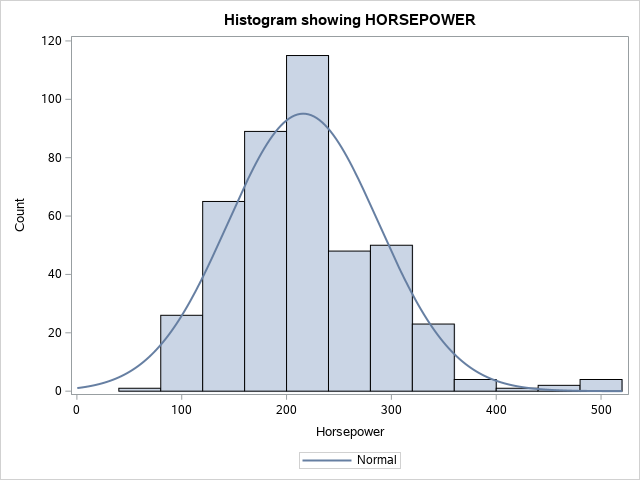


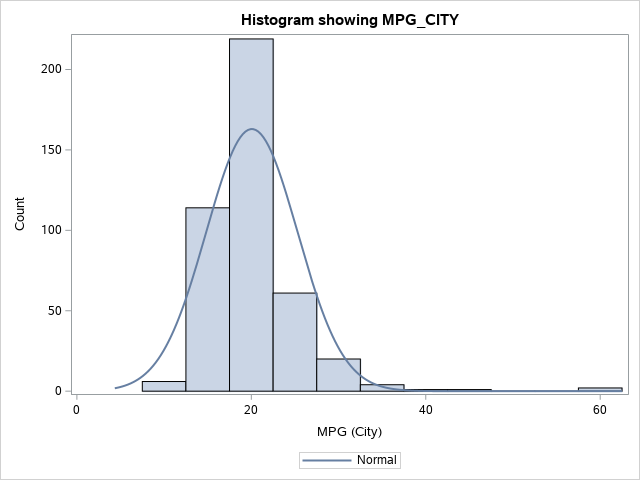


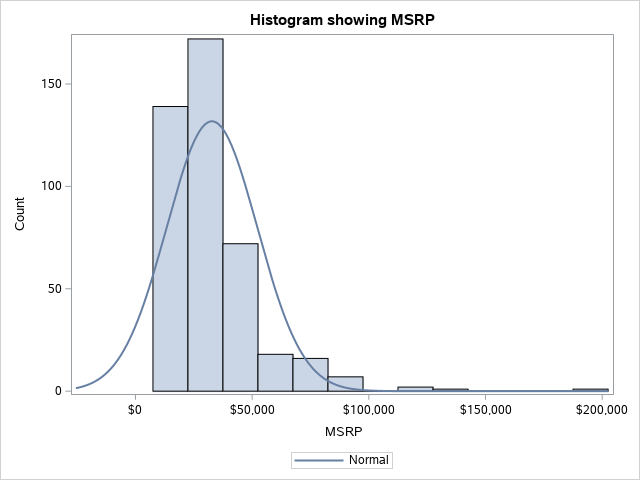

In [63]:
#3.1 histogram
for col in ['horsepower','MPG_City', 'MSRP']:
    cars.hist(col, title='Histogram showing '+col.upper())

In [65]:
#3.1 cars.hist()
cars.hist?

Signature: cars.hist(var:str, title:str='', label:str='') -> object
Docstring:
This method requires a numeric column (use the contents method to see column types) and generates a histogram.

:param var: the NUMERIC variable (column) you want to plot
:param title: an optional Title for the chart
:param label: LegendLABEL= value for sgplot
:return:
File:      /usr/lib64/python3.5/site-packages/saspy/sasbase.py
Type:      method


In [66]:
#3.1 teach me sas
sas.teach_me_SAS(True)

In [67]:
#3.1 cars.describe()
cars.describe()

proc means data=SASHELP.CARS stackodsoutput n nmiss median mean std min p25 p50 p75 max;run;


In [71]:
#3.3 python data access- reading .csv
#importing pandas package to access dataframe, or create new columns, manipulations
import pandas as pd
#build a specific connection
import ssl
import urllib

In [72]:
#3.3 Python data access - .csv
#This code connects to the GitHub site (using HTTPS) 
#and accesses the CSV  file in that repository. 
context = ssl._create_unverified_context()

In [73]:
#3.3  Python data access -.csv
#requesting online for this .csv thro' python need this syntax, can be used for 
#web scrubbing
link_info = urllib.request.urlopen('https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv', 
  context=context)

In [74]:
#3.3 python data access -.csv
#building a dataframe in panda with pd.read_csv 
df = pd.read_csv(link_info)
df.describe()

,Almost Certainly,Highly Likely,Very Good Chance,Probable,Likely,Probably,We Believe,Better Than Even,About Even,We Doubt,Improbable,Unlikely,Probably Not,Little Chance,Almost No Chance,Highly Unlikely,Chances Are Slight
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,92.645652,86.217391,79.760870,71.456522,72.000000,71.521739,68.521739,58.393478,49.565217,27.869565,18.021761,19.934783,29.476087,15.978261,5.631522,10.130435,14.086957
std,7.103542,12.878773,6.467645,10.243061,9.874771,10.974190,16.734182,11.788213,1.857743,20.175462,14.384361,10.047448,14.858880,14.320908,13.814772,13.522999,8.948808
min,60.000000,15.000000,65.000000,50.000000,40.000000,45.000000,5.000000,5.000000,40.000000,1.000000,0.000000,2.000000,10.000000,2.000000,0.050000,2.000000,5.000000
25%,90.000000,84.250000,75.000000,65.000000,65.000000,65.000000,60.000000,55.000000,50.000000,15.000000,7.000000,10.000000,20.000000,10.000000,1.000000,5.000000,10.000000
50%,95.000000,90.000000,80.000000,70.000000,70.000000,75.000000,70.000000,60.000000,50.000000,25.000000,15.000000,20.000000,26.500000,15.000000,2.000000,5.000000,10.000000
75%,97.750000,95.000000,85.000000,78.750000,75.000000,80.000000,80.000000,60.000000,50.000000,33.000000,28.000000,28.750000,38.750000,20.000000,5.000000,10.000000,15.000000
max,99.000000,99.000000,91.000000,90.000000,90.000000,90.000000,100.000000,98.000000,52.000000,100.000000,50.000000,36.000000,100.000000,100.000000,95.000000,90.000000,40.000000


In [ ]:
sas.